In [7]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
import math
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib
Built on matlab. A bit old fashioned and verbose. Like using base R.

Seaborn built on matplotlib. Like ggplot.

Plotly built on d3. interactivew.

https://towardsdatascience.com/matplotlib-vs-seaborn-vs-plotly-f2b79f5bddb 


# Setup/get data


Get sklearn built in data

In [3]:
dir(sklearn.datasets)[15:20] # print all 
iris = sklearn.datasets.load_iris()
# convert to pandas df
iris = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns=iris.feature_names + ['target'])

Clean column names

In [4]:
iris.columns = [c.replace(' ', '_') for c in iris.columns]
iris.rename(columns={'sepal_length_(cm)': 'sepal_length', 
                     'sepal_width_(cm)': 'sepal_width', 
                     'petal_length_(cm)':  'petal_length',
                     'petal_width_(cm)': 'petal_width'}, inplace=True)

# easiest: .hist

But can only set range (i.e., xlim) globally for all columns.

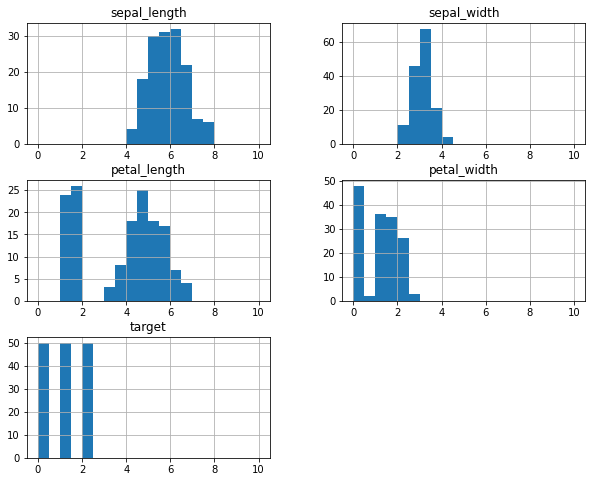

In [48]:
iris.hist(bins=20, figsize=(10,8), range=(0,10)) 
plt.show() 

# Set per figure: use a loop

good: can set stuff per figure. 
- eg, w very varying ranges, can set xlim to change based on column.
- can modify all plots

bad: if do nrows=2 in plt.subplots() , creates an additional blank plot for each plot.

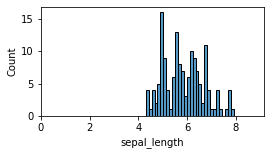

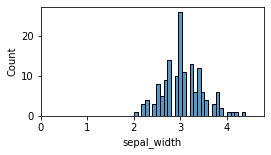

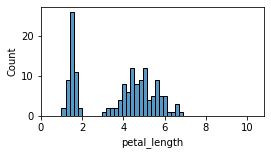

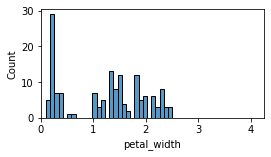

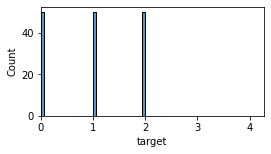

In [37]:
for column in iris.columns:

        fig, ax = plt.subplots() 
        hist = sns.histplot(x=column, data=iris, bins = 30)
        hist.set(xlim=(0,
                       iris[column].mean()+(4*iris[column].std())
                      )
                )
        fig.set_size_inches(4,2)

plt.show()


# Use a loop with enumerate and add_subplot

Now you can do multiple rows.

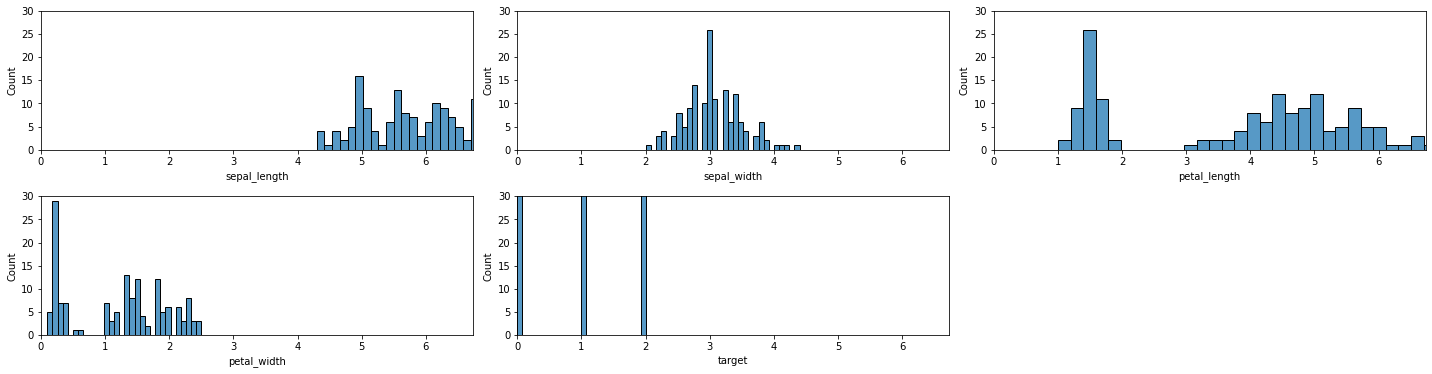

In [49]:
fig = plt.figure(figsize=(20,10))
for i, feature in enumerate(iris):
    ax=fig.add_subplot(4,3,i+1)
    ax = sns.histplot(x=feature, data=iris, bins = 30)
    ax.set(
           xlim=(0, iris[column].mean()+(7*iris[column].std())),
           ylim=(0,30)
               )

    
fig.tight_layout()  
plt.show()

# Loop


based on [i][j] notation: https://python-tricks.com/subplot-in-matplotlib/

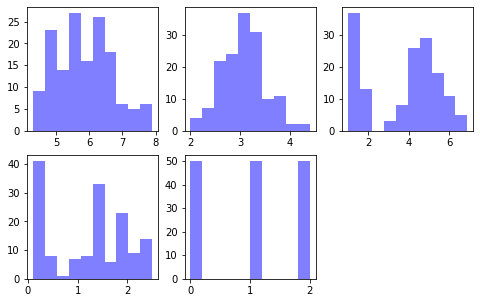

In [34]:
ncols = 3
nrows = int(np.ceil(len(iris.columns) / (ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 5))

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(iris.columns):

            ax.hist(iris[iris.columns[counter]], 
                    bins=10, 
                    color='blue', alpha=0.5
                    #label=iris.columns[counter] # doesn't work: key error. works in original example.
                   )
            
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

## Variable intercorrelations


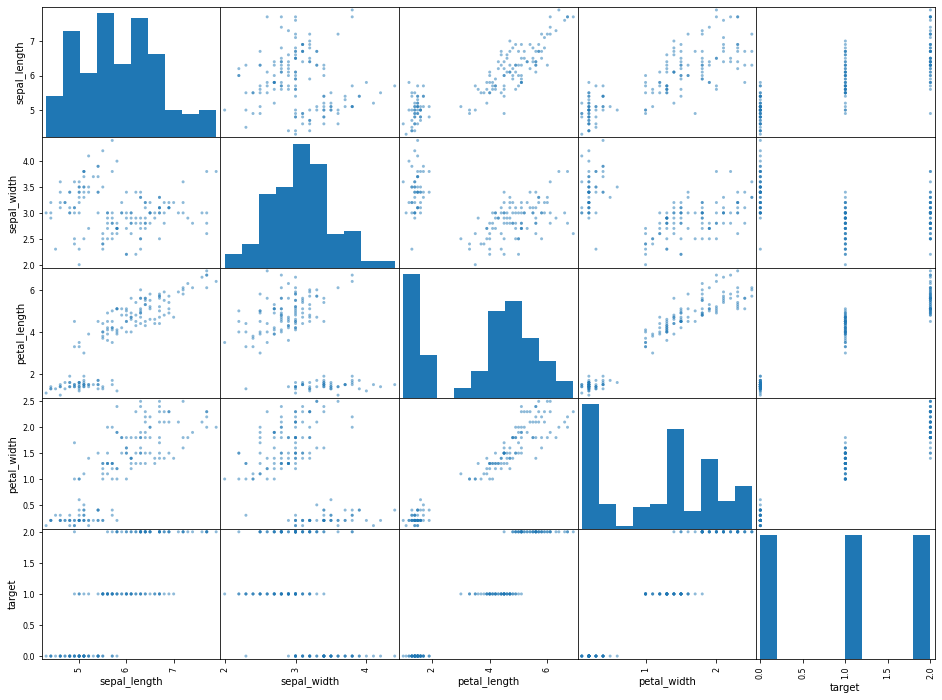

In [50]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, figsize=(16, 12))
plt.show() # suppresses verbose text output

(0.0, 20.0)

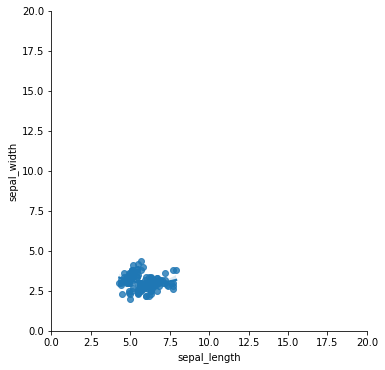

In [52]:
sns.lmplot(x='sepal_length', y='sepal_width', order=2, data=iris)
plt.ylim(0, 20)
plt.xlim(0, 20)

## Plot with log

In [ ]:
df.groupby("group").count()["things_in_groups"].hist(bins=np.logspace(0,6,100), log='xy')
# you can also log just one axis:
# df.groupby("group").count()["things_in_groups"].hist(bins=np.logspace(0,6,100), log='y')

plt.loglog()
plt.xlabel("Number of things in group")
plt.ylabel("Count of groups")
plt.show()
